In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
from sklearn.decomposition import FastICA

In [2]:
eeg = pd.read_csv('eeg.csv')
eeg *= 10**6 # from V to uV

In [45]:
eeg

,FP2-F4,F4 -C4,C4 -P4,P4 -O2,FP2-F8,F8 -T4,T4 -T6,T6 -O2,FP1-F3,F3 -C3,C3 -P3,P3 -O1,FP1-F7,F7 -T3,T3 -T5,T5 -O1,T6 -A1,O1 -A1,O2 -A1
0,45000000,-704000000,-371000000,-128000000,63000000,-384000000,-484000000,177000000,265000000,211000000,191000000,-502000000,103000000,370000000,378000000,148000000,-192000000,233000000,525000000
1,30000000,-786000000,-418000000,94000000,37000000,-380000000,-526000000,403000000,320000000,186000000,194000000,-528000000,195000000,325000000,402000000,156000000,-240000000,231000000,315000000
2,-33000000,-953000000,-506000000,444000000,-12000000,-407000000,-621000000,757000000,415000000,154000000,213000000,-586000000,338000000,273000000,473000000,154000000,-334000000,279000000,1000000
3,-118000000,-1094000000,-574000000,911000000,-86000000,-404000000,-703000000,1190000000,510000000,97000000,216000000,-618000000,508000000,179000000,526000000,126000000,-441000000,329000000,-454000000
4,-170000000,-1090000000,-566000000,1486000000,-189000000,-304000000,-707000000,1655000000,568000000,-8000000,168000000,-544000000,677000000,-3000000,500000000,72000000,-522000000,321000000,-1089000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,-102000000,77000000,-5000000,-26000000,-45000000,18000000,24000000,-54000000,-6000000,-9000000,24000000,4000000,-21000000,29000000,6000000,-2000000,-41000000,-8000000,13000000
1276,-108000000,75000000,-12000000,-22000000,-44000000,7000000,23000000,-52000000,1000000,-11000000,21000000,1000000,-20000000,30000000,0,4000000,-43000000,-12000000,8000000
1277,-112000000,69000000,-17000000,-18000000,-41000000,-8000000,21000000,-50000000,7000000,-14000000,17000000,2000000,-19000000,27000000,-6000000,10000000,-41000000,-14000000,8000000
1278,-117000000,61000000,-19000000,-16000000,-36000000,-25000000,16000000,-46000000,9000000,-16000000,11000000,6000000,-19000000,24000000,-9000000,15000000,-38000000,-17000000,8000000


## Visualization of Channels

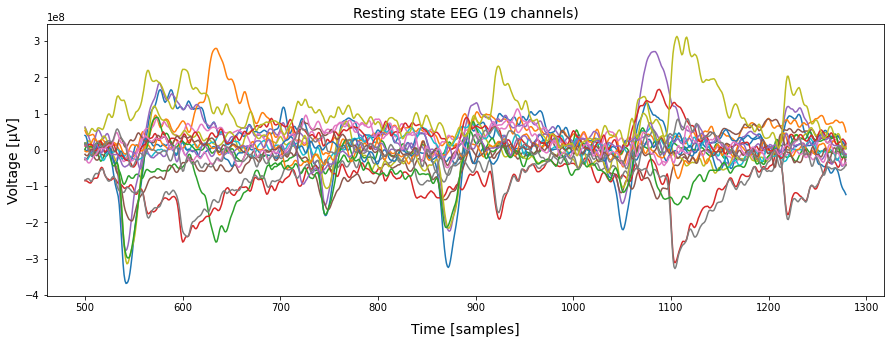

In [3]:
eeg.iloc[500:2500].plot(figsize=(15,5), legend=False)
plt.xlabel('Time [samples]', fontsize=14, labelpad=10)
plt.ylabel('Voltage [\u03BCV]', fontsize=14)
plt.title('Resting state EEG (19 channels)', fontsize=14)
#plt.savefig('eeg_all.png')
plt.show()

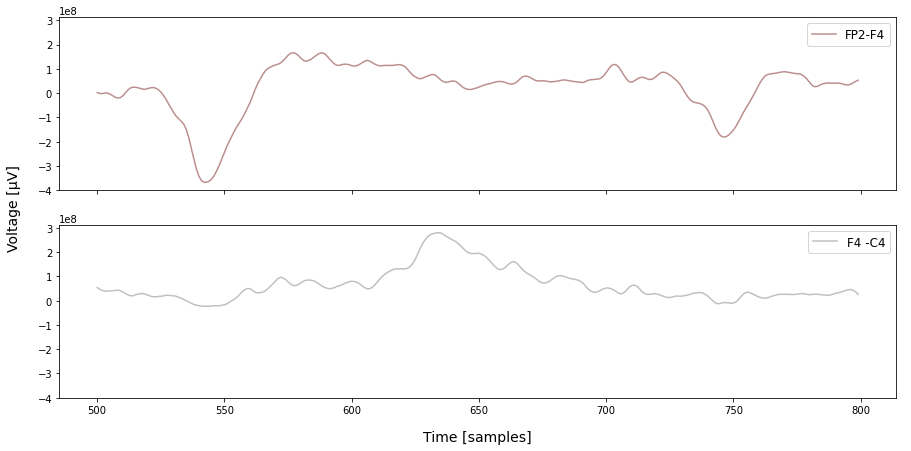

In [4]:
fig, axs = plt.subplots(2,1, figsize=(15, 7), sharex=True, sharey=True)
axs = axs.ravel()
plt.margins(x=0.001)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axs[0].plot(eeg.iloc[500:800,0], label='FP2-F4', color='rosybrown')
axs[0].legend(loc="upper right", fontsize=12)
axs[1].plot(eeg.iloc[500:800,1], label='F4 -C4', color='silver')
axs[1].legend(loc="upper right", fontsize=12)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)
plt.ylabel('Voltage [\u03BCV]', fontsize=14, labelpad=15)
#plt.savefig('fp1_fp2.png')
plt.show()

## ICA

In [5]:
ica = FastICA(n_components=19, random_state=0, tol=0.05)
comps = ica.fit_transform(eeg)

#### Visualize ICA components

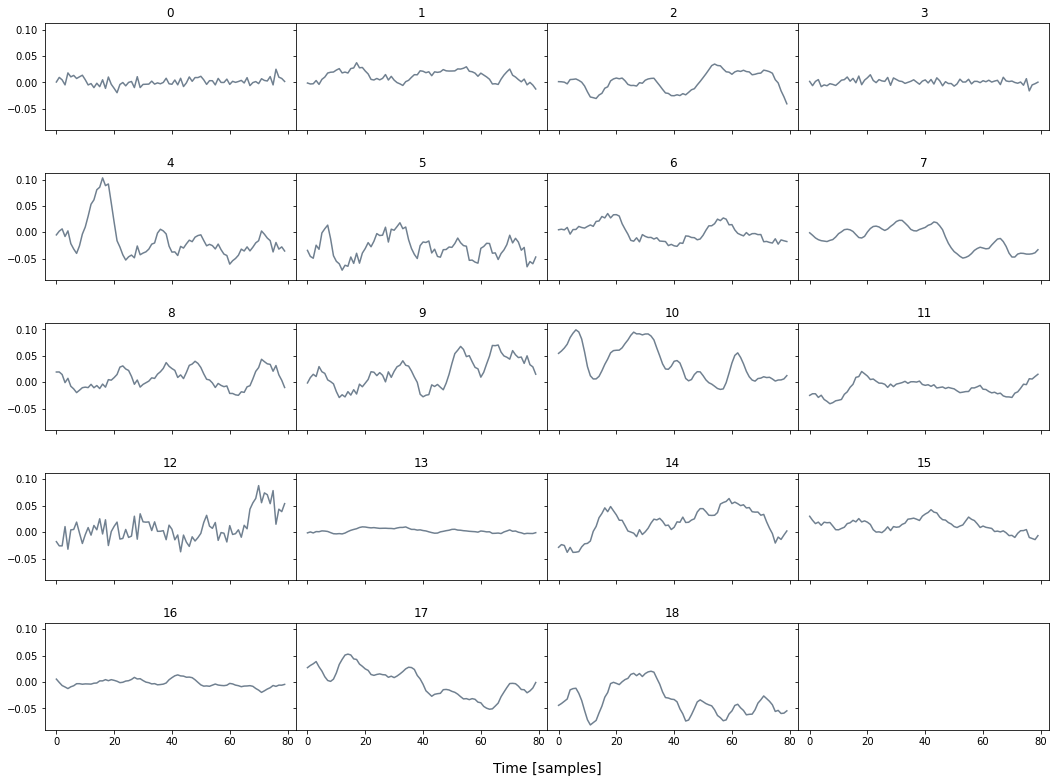

In [6]:
fig, axs = plt.subplots(5,4, figsize=(18, 13), sharex=True, sharey=True)
fig.subplots_adjust(hspace = .4, wspace=0)
axs = axs.ravel()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)

for i in range(19):
    axs[i].plot(comps[1200:1600, i], color='slategrey')
    axs[i].set_title(str(i))
    
#plt.savefig('ica_comps.png')

#### Remove components containing eye blinks / movements

In [7]:
comps_restored = comps.copy()
comps_restored[:,[4,10]] = 0 # set artefact components to zero
restored = ica.inverse_transform(comps_restored)

## Static Plot

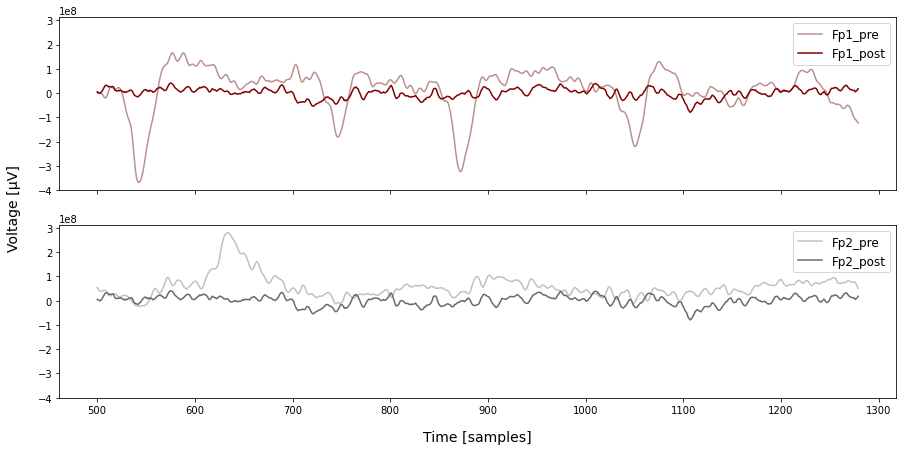

In [8]:
fig, axs = plt.subplots(2,1, figsize=(15, 7), sharex=True, sharey=True)
axs = axs.ravel()
plt.margins(x=0.001)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axs[0].plot(eeg.iloc[500:1300,0], label='Fp1_pre', color='rosybrown')
axs[0].plot(np.arange(500,1280), restored[500:2500, 11], label='Fp1_post', color='maroon')
axs[0].legend(loc="upper right", fontsize=12)
axs[1].plot(eeg.iloc[500:1300,1], label='Fp2_pre', color='silver')
axs[1].plot(np.arange(500,1280), restored[500:2500, 11], label='Fp2_post', color='dimgray')
axs[1].legend(loc="upper right", fontsize=12)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)
plt.ylabel('Voltage [\u03BCV]', fontsize=14, labelpad=15)
#plt.savefig('post_ica.png')
plt.show()